In [1]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from dt_utils import *
from nn_utils import *

C:\Users\11045\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


In [2]:
# signal
s0 = pd.read_csv ( "signal.csv" )
s1 = pd.read_csv ( "0.csv" )
s2 = pd.read_csv ( "30.csv" )
s3 = pd.read_csv ( "60.csv" )

# bkg
b1 = pd.read_csv ( "sideband.csv" )
b2 = pd.read_csv ( "nearsignal.csv" )

In [3]:
s0.head()

,phib,phif,phitstar,phiw,t,thetab,thetaf,thetah,thetat,thetaw,tt,tth,isSignal
0,1.776711,0.143551,2.339913,0.801155,164.301453,-0.602587,-0.138064,-0.431957,0.824506,-0.986344,508.706277,654.761522,1
1,2.297378,2.596617,0.807411,2.444087,176.409197,-0.107238,0.579830,-0.076104,0.227356,-0.761026,398.245685,666.181151,1
2,0.193672,1.353251,2.078824,0.027977,238.333208,-0.195123,-0.113941,0.400439,0.733118,-0.469149,688.912306,865.764571,1
3,0.339953,0.732237,2.169004,0.763360,311.516453,0.775987,-0.210501,-0.403187,-0.557023,0.206261,722.718271,962.753343,1
4,1.367030,0.599763,2.644733,0.237751,510.443625,0.342434,-0.811117,0.939705,-0.935776,0.237037,735.070052,991.462335,1


In [4]:
# total bkg
b = pd.concat([b1,b2])
b = shuffle(b,random_state=42).reset_index(drop=True)
b.head()

,phib,phif,phitstar,phiw,t,thetab,thetaf,thetah,thetat,thetaw,tt,tth,isSignal
0,2.920753,1.090986,1.733981,0.137239,237.483494,0.065678,0.682121,0.917943,0.691897,-0.429924,1268.745280,1430.672788,0
1,2.835025,1.946042,1.402751,2.896944,221.302818,0.421983,-0.180910,-0.915062,0.144920,-0.656387,716.177864,923.922878,0
2,2.973645,2.530269,1.016207,1.918484,259.109181,-0.478403,-0.916697,-0.677089,-0.902995,-0.954527,673.165946,807.950518,0
3,1.654473,1.665302,2.096471,0.131641,161.244787,-0.575664,-0.940423,0.789105,0.529844,0.269053,837.942784,977.678059,0
4,2.122228,1.143082,0.394234,0.968614,692.932057,-0.270787,0.710969,-0.932373,0.732293,0.965699,523.067557,702.426124,0


In [5]:
s0.columns

Index(['phib', 'phif', 'phitstar', 'phiw', 't', 'thetab', 'thetaf', 'thetah',
       'thetat', 'thetaw', 'tt', 'tth', 'isSignal'],
      dtype='object')

In [6]:
c0 = ['phib', 'phif', 'phitstar', 'phiw', 't', 'thetab', 'thetaf', 'thetah','thetat', 'thetaw', 'tt', 'tth']

In [7]:
s0.shape,s1.shape,s2.shape,s3.shape

((89694, 13), (38100, 13), (138901, 13), (138005, 13))

In [8]:
b.shape

(11106, 13)

In [9]:
# sample signal: alpha = 0
S0 = s0.sample(b.shape[0], random_state=42)

# training dataset
train0 = pd.concat([S0,b])

# Shuffle training dataset
train0 = shuffle(train0,random_state=42).reset_index(drop=True)
train0

,phib,phif,phitstar,phiw,t,thetab,thetaf,thetah,thetat,thetaw,tt,tth,isSignal
0,2.666109,0.659017,1.218142,0.900543,326.429093,0.127155,0.066293,-0.946580,-0.154676,-0.475217,980.827796,1179.845163,0
1,2.633734,1.050419,1.514080,0.070999,242.477516,-0.114385,-0.405857,0.778213,0.432509,0.956330,487.019795,653.468546,0
2,0.191305,1.442063,1.512599,0.471443,189.110600,0.228759,-0.061159,0.823676,0.826521,0.925808,636.961543,841.914035,0
3,2.400480,2.663370,1.923765,0.201620,189.840571,0.951206,-0.929448,-0.394958,0.396540,-0.357498,976.467591,1110.236748,0
4,1.695086,1.560961,1.073626,2.521570,234.239965,-0.813386,0.767695,0.565900,0.143279,-0.897611,403.705295,540.959798,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
22207,0.617145,1.558053,2.009384,0.422967,152.103422,0.686124,-0.789562,0.712741,0.868207,-0.600543,1087.259019,1303.505239,0
22208,2.253724,1.330466,2.475894,1.290946,258.409579,-0.879863,0.933522,0.991576,0.640591,-0.977520,319.781103,472.132595,0
22209,0.365679,0.677268,0.224996,0.425373,591.047651,0.783153,0.525061,-0.504132,0.632485,-0.112665,691.898581,1069.158433,1
22210,1.738181,0.090726,0.798579,0.720761,301.629728,-0.143673,0.749478,0.927048,-0.841905,0.820607,486.169936,601.450578,1


In [10]:
# Keras imports
from tensorflow . keras . models import Sequential
from tensorflow . keras . layers import Dense
from tensorflow . keras . layers import Dropout
from sklearn import model_selection , preprocessing

## signal vs. background

In [11]:
# Standardize
sc0 = preprocessing . StandardScaler ()
input_data0 = sc0 . fit_transform ( train0[c0[0:12]] )
target0 = train0['isSignal']
# set random seed
Answer_to_all_questions = 42
# train - test split of dataset
train_data0 , test_data0 , train_target0 , test_target0 = model_selection . train_test_split (\
input_data0 , target0 , test_size =0.3 , random_state = Answer_to_all_questions )
# Check shape
print ( train_data0 . shape , train_target0 . shape , test_data0 . shape , test_target0 . shape )

(15548, 12) (15548,) (6664, 12) (6664,)


In [12]:
def my_model ( num_inputs , num_nodes , extra_depth ):
    # create model
    model = Sequential ()
    model . add ( Dense ( num_nodes , input_dim = num_inputs , kernel_initializer ='normal' , activation ='relu'))
    model . add ( Dropout (0.2))
    
    for i in range ( extra_depth ):
        # code up the extra layers here
        model . add ( Dense ( num_nodes , input_dim = num_inputs , kernel_initializer ='normal' , activation ='relu'))
        model . add ( Dropout (0.2))
        
    model . add ( Dense (1 , activation ='sigmoid'))
    # Compile model
    model . compile ( loss ='binary_crossentropy' , optimizer = 'adam', metrics =['accuracy'])
    return model

In [13]:
# Set early stop
from keras . callbacks import EarlyStopping , ModelCheckpoint

callbacks_ = [
# if we don ’t have an increase of the accuracy for 15 epochs , terminate training .
EarlyStopping ( verbose = True , patience =15 , monitor ='val_acc' ) ,
# Always make sure that we ’re saving the model weights with the best accuracy .
ModelCheckpoint ('model .h5' , monitor ='val_acc' , verbose =0 , save_best_only = True , mode ='max' )]

model0 = my_model(12,100,3)

history0 =  model0. fit ( train_data0 , train_target0 , batch_size = 30 , epochs = 300 , verbose =1 , validation_data =( test_data0 , test_target0 ) , callbacks = callbacks_ )

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


Using TensorFlow backend.


Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 15548 samples, validate on 6664 samples
Epoch 1/300
15548/15548 [==============================] - 1s 88us/sample - loss: 0.6916 - acc: 0.5223 - val_loss: 0.6879 - val_acc: 0.5374
Epoch 2/300
15548/15548 [==============================] - 1s 66us/sample - loss: 0.6775 - acc: 0.5720 - val_loss: 0.6686 - val_acc: 0.5933
Epoch 3/300
15548/15548 [==============================] - 1s 68us/sample - loss: 0.6680 - acc: 0.5920 - val_loss: 0.6650 - val_acc: 0.5983
Epoch 4/300
15548/15548 [==============================] - 1s 64us/sample - loss: 0.6627 - acc: 0.6066 - val_loss: 0.6588 - val_acc: 0.6145
Epoch 5/300
15548/15548 [==============================] - 1s 65us/sample - loss: 0.6586 - acc: 0.6087 - val_loss: 0.6565 - val_acc: 0.6152
Epoch 6/300
15548/15548 [==============

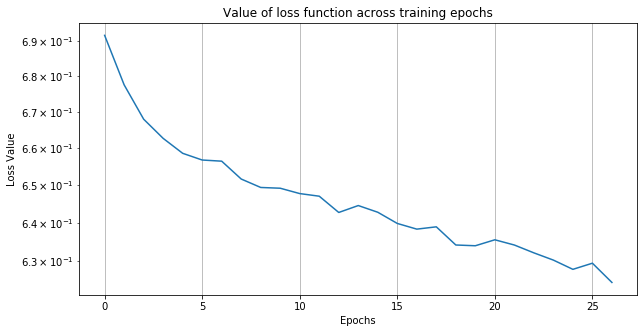

In [14]:
# Loss
lossplot(history0.history['loss'], scale='log');

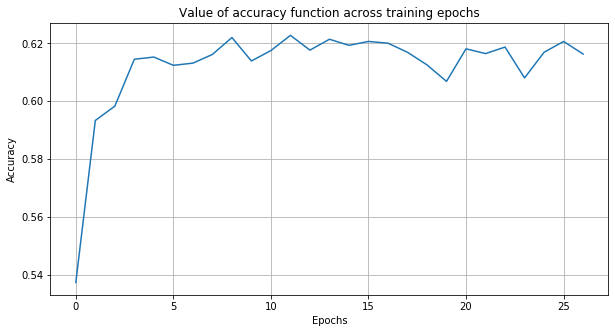

In [15]:
# Accuracy
accplot(history0.history['val_acc'], scale='linear')

In [16]:
from sklearn.metrics import confusion_matrix, roc_curve

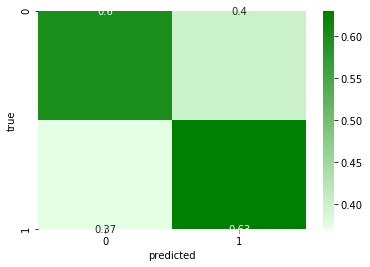

In [17]:
# Predictions
pred0 = model0.predict(test_data0)

# Convert probabilities into binary outputs
bi = []
p = []
for i in pred0:
    if i[0]>0.5:
        bi.append(1)
        p.append(i[0])
    else:
        bi.append(0)
        p.append(i[0])
        
# Define confusion matrix and classes
cm = confusion_matrix(test_target0.tolist(),bi)
classes=[0,1]

# Plot heat map
heatmap(cm,normalize=True,labels=['predicted','true'],classes=[['0','1'],['0','1']])

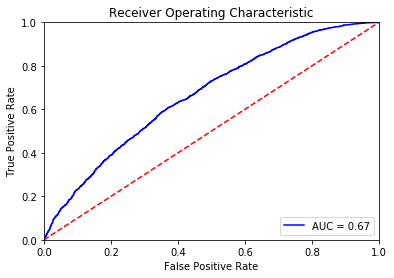

In [18]:
# Calculate false positive rate and true positive rate
fpr, tpr, threshold = roc_curve(test_target0, pred0)
roc_auc = metrics.auc(fpr, tpr)
# Plot ROC curve
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## CP0 vs background

In [19]:
# sample signal: alpha = 0
S1 = s1.sample(b.shape[0], random_state=42)

# training dataset
train1 = pd.concat([S1,b])

# Shuffle training dataset
train1 = shuffle(train1,random_state=42).reset_index(drop=True)
train1

,phib,phif,phitstar,phiw,t,thetab,thetaf,thetah,thetat,thetaw,tt,tth,isSignal
0,2.666109,0.659017,1.218142,0.900543,326.429093,0.127155,0.066293,-0.946580,-0.154676,-0.475217,980.827796,1179.845163,0
1,2.633734,1.050419,1.514080,0.070999,242.477516,-0.114385,-0.405857,0.778213,0.432509,0.956330,487.019795,653.468546,0
2,0.191305,1.442063,1.512599,0.471443,189.110600,0.228759,-0.061159,0.823676,0.826521,0.925808,636.961543,841.914035,0
3,2.400480,2.663370,1.923765,0.201620,189.840571,0.951206,-0.929448,-0.394958,0.396540,-0.357498,976.467591,1110.236748,0
4,2.602972,2.379159,1.428661,1.312775,427.481756,0.110223,-0.422071,-0.516657,0.439781,0.083684,940.026766,1123.360261,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
22207,0.617145,1.558053,2.009384,0.422967,152.103422,0.686124,-0.789562,0.712741,0.868207,-0.600543,1087.259019,1303.505239,0
22208,2.253724,1.330466,2.475894,1.290946,258.409579,-0.879863,0.933522,0.991576,0.640591,-0.977520,319.781103,472.132595,0
22209,3.026516,2.817986,2.652779,2.583968,155.310574,0.830668,0.017505,-0.902279,-0.878697,-0.013511,779.623333,941.757176,1
22210,2.832917,1.292186,1.424796,2.386450,866.190305,-0.569830,0.909869,0.927811,-0.492022,0.743300,1250.525708,1435.903622,1


In [20]:
# Standardize
sc1 = preprocessing . StandardScaler ()
input_data1 = sc1 . fit_transform ( train1[c0[0:12]] )
target1 = train1['isSignal']

# train - test split of dataset
train_data1 , test_data1 , train_target1 , test_target1 = model_selection . train_test_split (\
input_data1 , target1 , test_size =0.3 , random_state = Answer_to_all_questions )
# Check shape
print ( train_data1 . shape , train_target1 . shape , test_data1 . shape , test_target1 . shape )

(15548, 12) (15548,) (6664, 12) (6664,)


In [21]:
# train
model1 = my_model(12,100,2)
history1 =  model1. fit ( train_data1 , train_target1 , batch_size = 30 , epochs = 300 , verbose =1 , validation_data =( test_data1 , test_target1 ) , callbacks = callbacks_ )

Train on 15548 samples, validate on 6664 samples
Epoch 1/300
15548/15548 [==============================] - 1s 89us/sample - loss: 0.6914 - acc: 0.5189 - val_loss: 0.6877 - val_acc: 0.5438
Epoch 2/300
15548/15548 [==============================] - 1s 71us/sample - loss: 0.6806 - acc: 0.5680 - val_loss: 0.6685 - val_acc: 0.5996
Epoch 3/300
15548/15548 [==============================] - 1s 69us/sample - loss: 0.6686 - acc: 0.5960 - val_loss: 0.6629 - val_acc: 0.5977
Epoch 4/300
15548/15548 [==============================] - 1s 66us/sample - loss: 0.6632 - acc: 0.6023 - val_loss: 0.6589 - val_acc: 0.6080
Epoch 5/300
15548/15548 [==============================] - 1s 65us/sample - loss: 0.6584 - acc: 0.6129 - val_loss: 0.6581 - val_acc: 0.6098
Epoch 6/300
15548/15548 [==============================] - 1s 64us/sample - loss: 0.6584 - acc: 0.6108 - val_loss: 0.6568 - val_acc: 0.6158
Epoch 7/300
15548/15548 [==============================] - 1s 67us/sample - loss: 0.6562 - acc: 0.6145 - val_lo

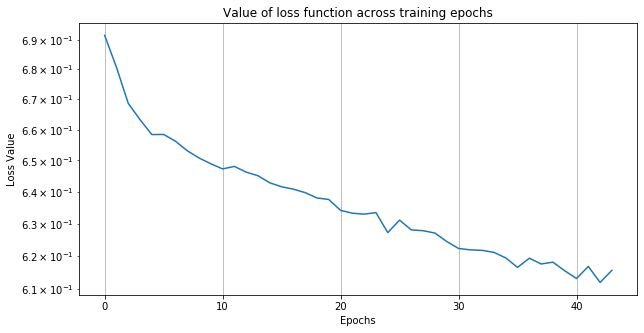

In [22]:
# Loss
lossplot(history1.history['loss'], scale='log');

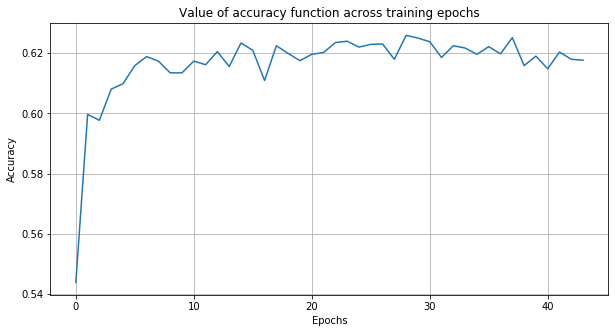

In [23]:
# Accuracy
accplot(history1.history['val_acc'], scale='linear')

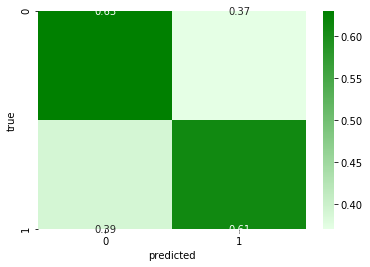

In [24]:
# Predictions
pred1 = model1.predict(test_data1)

# Convert probabilities into binary outputs
bi = []
p = []
for i in pred1:
    if i[0]>0.5:
        bi.append(1)
        p.append(i[0])
    else:
        bi.append(0)
        p.append(i[0])
        
# Define confusion matrix and classes
cm = confusion_matrix(test_target1.tolist(),bi)
classes=[0,1]

# Plot heat map
heatmap(cm,normalize=True,labels=['predicted','true'],classes=[['0','1'],['0','1']])

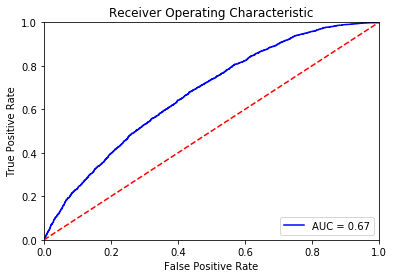

In [25]:
# Calculate false positive rate and true positive rate
fpr, tpr, threshold = roc_curve(test_target1, pred1)
roc_auc = metrics.auc(fpr, tpr)
# Plot ROC curve
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## CP30 vs background

In [26]:
# sample signal: alpha = 30
S2 = s2.sample(b.shape[0], random_state=42)

# training dataset
train2 = pd.concat([S2,b])

# Shuffle training dataset
train2 = shuffle(train2,random_state=42).reset_index(drop=True)
train2

,phib,phif,phitstar,phiw,t,thetab,thetaf,thetah,thetat,thetaw,tt,tth,isSignal
0,2.666109,0.659017,1.218142,0.900543,326.429093,0.127155,0.066293,-0.946580,-0.154676,-0.475217,980.827796,1179.845163,0
1,2.633734,1.050419,1.514080,0.070999,242.477516,-0.114385,-0.405857,0.778213,0.432509,0.956330,487.019795,653.468546,0
2,0.191305,1.442063,1.512599,0.471443,189.110600,0.228759,-0.061159,0.823676,0.826521,0.925808,636.961543,841.914035,0
3,2.400480,2.663370,1.923765,0.201620,189.840571,0.951206,-0.929448,-0.394958,0.396540,-0.357498,976.467591,1110.236748,0
4,2.491433,2.269836,1.181117,0.091614,174.395365,-0.458225,-0.292384,0.821720,0.261416,-0.447083,542.640597,742.676967,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
22207,0.617145,1.558053,2.009384,0.422967,152.103422,0.686124,-0.789562,0.712741,0.868207,-0.600543,1087.259019,1303.505239,0
22208,2.253724,1.330466,2.475894,1.290946,258.409579,-0.879863,0.933522,0.991576,0.640591,-0.977520,319.781103,472.132595,0
22209,0.481244,1.946183,2.552701,0.417852,159.582771,-0.433336,-0.510475,0.936356,-0.102932,-0.474294,809.720852,1168.876785,1
22210,1.151755,1.792614,1.338921,1.842647,160.120295,0.405887,-0.518286,0.051884,-0.419421,-0.552780,444.438552,658.352398,1


In [27]:
# Standardize
sc2 = preprocessing . StandardScaler ()
input_data2 = sc2 . fit_transform ( train2[c0[0:12]] )
target2 = train2['isSignal']

# train - test split of dataset
train_data2 , test_data2 , train_target2 , test_target2 = model_selection . train_test_split (\
input_data2 , target2 , test_size =0.3 , random_state = Answer_to_all_questions )
# Check shape
print ( train_data2 . shape , train_target2 . shape , test_data2 . shape , test_target2 . shape )

(15548, 12) (15548,) (6664, 12) (6664,)


In [28]:
# train
model2 = my_model(12,100,2)
history2 =  model2. fit ( train_data2 , train_target2 , batch_size = 30 , epochs = 300 , verbose =1 , validation_data =( test_data2 , test_target2 ) , callbacks = callbacks_ )

Train on 15548 samples, validate on 6664 samples
Epoch 1/300
15548/15548 [==============================] - 1s 86us/sample - loss: 0.6900 - acc: 0.5304 - val_loss: 0.6813 - val_acc: 0.5719
Epoch 2/300
15548/15548 [==============================] - 1s 66us/sample - loss: 0.6777 - acc: 0.5741 - val_loss: 0.6705 - val_acc: 0.5828
Epoch 3/300
15548/15548 [==============================] - 1s 66us/sample - loss: 0.6664 - acc: 0.5959 - val_loss: 0.6570 - val_acc: 0.6140
Epoch 4/300
15548/15548 [==============================] - 1s 66us/sample - loss: 0.6589 - acc: 0.6073 - val_loss: 0.6557 - val_acc: 0.6146
Epoch 5/300
15548/15548 [==============================] - 1s 65us/sample - loss: 0.6559 - acc: 0.6117 - val_loss: 0.6566 - val_acc: 0.6121
Epoch 6/300
15548/15548 [==============================] - 1s 81us/sample - loss: 0.6544 - acc: 0.6162 - val_loss: 0.6481 - val_acc: 0.6273
Epoch 7/300
15548/15548 [==============================] - 1s 68us/sample - loss: 0.6501 - acc: 0.6210 - val_lo

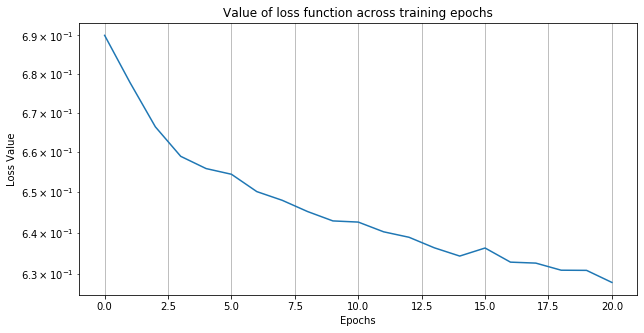

In [29]:
# Loss
lossplot(history2.history['loss'], scale='log');

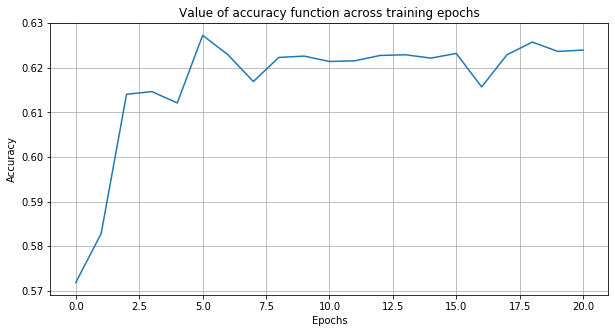

In [30]:
# Accuracy
accplot(history2.history['val_acc'], scale='linear')

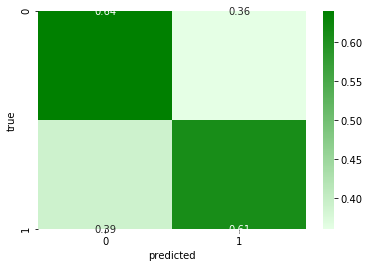

In [31]:
# Predictions
pred2 = model2.predict(test_data2)

# Convert probabilities into binary outputs
bi = []
p = []
for i in pred2:
    if i[0]>0.5:
        bi.append(1)
        p.append(i[0])
    else:
        bi.append(0)
        p.append(i[0])
        
# Define confusion matrix and classes
cm = confusion_matrix(test_target2.tolist(),bi)
classes=[0,1]

# Plot heat map
heatmap(cm,normalize=True,labels=['predicted','true'],classes=[['0','1'],['0','1']])

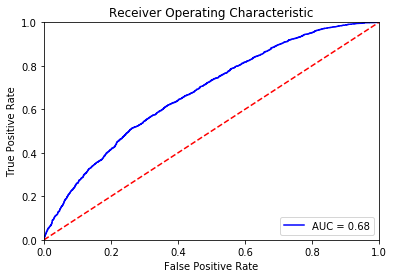

In [32]:
# Calculate false positive rate and true positive rate
fpr, tpr, threshold = roc_curve(test_target2, pred2)
roc_auc = metrics.auc(fpr, tpr)
# Plot ROC curve
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## CP60 vs. background

In [33]:
# sample signal: alpha = 30
S3 = s3.sample(b.shape[0], random_state=42)

# training dataset
train3 = pd.concat([S3,b])

# Shuffle training dataset
train3 = shuffle(train3,random_state=42).reset_index(drop=True)

In [34]:
# Standardize
sc3 = preprocessing . StandardScaler ()
input_data3 = sc3 . fit_transform ( train3[c0[0:12]] )
target3 = train3['isSignal']

# train - test split of dataset
train_data3 , test_data3 , train_target3 , test_target3 = model_selection . train_test_split (\
input_data3 , target3 , test_size =0.3 , random_state = Answer_to_all_questions )
# Check shape
print ( train_data3 . shape , train_target3 . shape , test_data3 . shape , test_target3 . shape )

(15548, 12) (15548,) (6664, 12) (6664,)


In [35]:
# train
model3 = my_model(12,200,2)
history3 =  model3. fit ( train_data3 , train_target3 , batch_size = 30 , epochs = 300 , verbose =1 , validation_data =( test_data3 , test_target3 ) , callbacks = callbacks_ )

Train on 15548 samples, validate on 6664 samples
Epoch 1/300
15548/15548 [==============================] - 2s 129us/sample - loss: 0.6812 - acc: 0.5575 - val_loss: 0.6581 - val_acc: 0.6091
Epoch 2/300
15548/15548 [==============================] - 2s 110us/sample - loss: 0.6513 - acc: 0.6150 - val_loss: 0.6459 - val_acc: 0.6255
Epoch 3/300
15548/15548 [==============================] - 2s 129us/sample - loss: 0.6414 - acc: 0.6369 - val_loss: 0.6356 - val_acc: 0.6417
Epoch 4/300
15548/15548 [==============================] - 2s 103us/sample - loss: 0.6344 - acc: 0.6444 - val_loss: 0.6321 - val_acc: 0.6465
Epoch 5/300
15548/15548 [==============================] - 1s 95us/sample - loss: 0.6334 - acc: 0.6412 - val_loss: 0.6251 - val_acc: 0.6508
Epoch 6/300
15548/15548 [==============================] - 1s 86us/sample - loss: 0.6284 - acc: 0.6528 - val_loss: 0.6235 - val_acc: 0.6505
Epoch 7/300
15548/15548 [==============================] - 1s 92us/sample - loss: 0.6251 - acc: 0.6484 - va

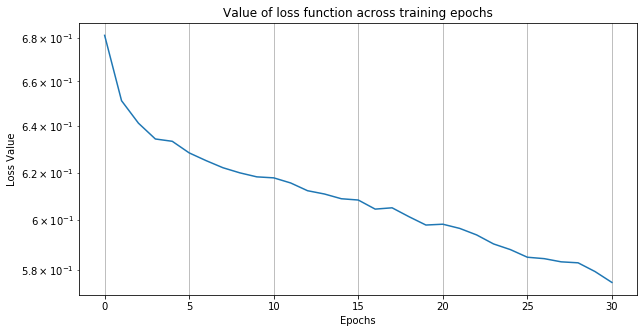

In [36]:
# Loss
lossplot(history3.history['loss'], scale='log');

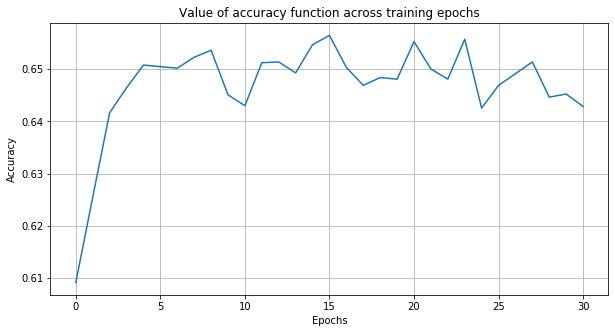

In [37]:
# Accuracy
accplot(history3.history['val_acc'], scale='linear')

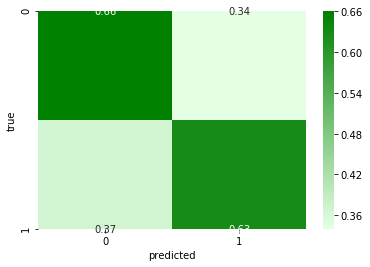

In [38]:
# Predictions
pred3 = model3.predict(test_data3)

# Convert probabilities into binary outputs
bi = []
p = []
for i in pred3:
    if i[0]>0.5:
        bi.append(1)
        p.append(i[0])
    else:
        bi.append(0)
        p.append(i[0])
        
# Define confusion matrix and classes
cm = confusion_matrix(test_target3.tolist(),bi)
classes=[0,1]

# Plot heat map
heatmap(cm,normalize=True,labels=['predicted','true'],classes=[['0','1'],['0','1']])

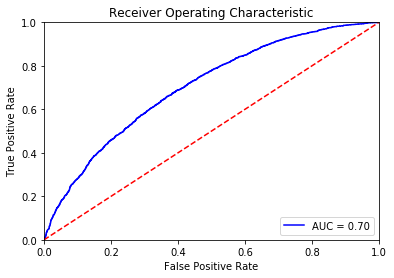

In [39]:
# Calculate false positive rate and true positive rate
fpr, tpr, threshold = roc_curve(test_target3, pred3)
roc_auc = metrics.auc(fpr, tpr)
# Plot ROC curve
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## CP0, 30 and 60

In [40]:
# ML imports
from sklearn.preprocessing import MinMaxScaler
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from tensorflow.python.keras.models import Model
from tensorflow.python.keras.layers import Input, Dense
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix

# Custom imports
import daml
from daml import plot, utilities, optimisation

In [41]:
s1.shape, s2.shape, s3.shape

((38100, 13), (138901, 13), (138005, 13))

In [42]:
cp0 = s1
cp0.insert(13,'alpha',0)
cp30 = s2.sample(s1.shape[0], random_state=42)
cp30.insert(13,'alpha',1)
cp60 = s3.sample(s1.shape[0], random_state=42)
cp60.insert(13,'alpha',2)

In [43]:
# training dataset
train4 = pd.concat([cp0,cp30,cp60])

# Shuffle training dataset
train4 = shuffle(train4,random_state=42).reset_index(drop=True)

# Standardize
sc4 = preprocessing . StandardScaler ()
input_data4 = sc4 . fit_transform ( train4[c0[0:12]] )
target4 = train4['alpha']

# train - test split of dataset
train_data4 , test_data4 , train_target4 , test_target4 = model_selection . train_test_split (\
input_data4 , target4 , test_size =0.3 , random_state = Answer_to_all_questions )
# Check shape
print ( train_data4 . shape , train_target4 . shape , test_data4 . shape , test_target4 . shape )

(80010, 12) (80010,) (34290, 12) (34290,)


In [65]:
def smallmodel (name):
    # Create a NW
    input_tensor = Input(shape=(12,))
    H1 = Dense(20, activation='relu')(input_tensor)
    output_tensor = Dense(3, activation='softmax')(H1)
    model = Model(input_tensor, output_tensor,name = name)
    # Compile the model
    model.compile(optimizer='Adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
    return model

# Get the model
model4 = smallmodel('Small model (standard)')
model4.summary()

Model: "Small model (standard)"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         [(None, 12)]              0         
_________________________________________________________________
dense_28 (Dense)             (None, 20)                260       
_________________________________________________________________
dense_29 (Dense)             (None, 3)                 63        
Total params: 323
Trainable params: 323
Non-trainable params: 0
_________________________________________________________________


In [66]:
# Compile and fit
cp = model4.fit(train_data4,train_target4,batch_size=200,epochs=100,validation_split=0.3,shuffle=True,verbose=2)

Train on 56007 samples, validate on 24003 samples
Epoch 1/100
56007/56007 - 1s - loss: 1.1329 - acc: 0.3399 - val_loss: 1.1069 - val_acc: 0.3497
Epoch 2/100
56007/56007 - 0s - loss: 1.1018 - acc: 0.3516 - val_loss: 1.1006 - val_acc: 0.3590
Epoch 3/100
56007/56007 - 0s - loss: 1.0972 - acc: 0.3588 - val_loss: 1.0979 - val_acc: 0.3607
Epoch 4/100
56007/56007 - 0s - loss: 1.0950 - acc: 0.3638 - val_loss: 1.0971 - val_acc: 0.3575
Epoch 5/100
56007/56007 - 0s - loss: 1.0939 - acc: 0.3656 - val_loss: 1.0960 - val_acc: 0.3587
Epoch 6/100
56007/56007 - 0s - loss: 1.0931 - acc: 0.3683 - val_loss: 1.0955 - val_acc: 0.3612
Epoch 7/100
56007/56007 - 0s - loss: 1.0926 - acc: 0.3678 - val_loss: 1.0956 - val_acc: 0.3585
Epoch 8/100
56007/56007 - 0s - loss: 1.0922 - acc: 0.3703 - val_loss: 1.0949 - val_acc: 0.3646
Epoch 9/100
56007/56007 - 0s - loss: 1.0919 - acc: 0.3708 - val_loss: 1.0946 - val_acc: 0.3635
Epoch 10/100
56007/56007 - 0s - loss: 1.0916 - acc: 0.3723 - val_loss: 1.0945 - val_acc: 0.3657

Epoch 86/100
56007/56007 - 1s - loss: 1.0878 - acc: 0.3799 - val_loss: 1.0933 - val_acc: 0.3727
Epoch 87/100
56007/56007 - 0s - loss: 1.0878 - acc: 0.3813 - val_loss: 1.0936 - val_acc: 0.3697
Epoch 88/100
56007/56007 - 0s - loss: 1.0877 - acc: 0.3825 - val_loss: 1.0934 - val_acc: 0.3737
Epoch 89/100
56007/56007 - 0s - loss: 1.0877 - acc: 0.3836 - val_loss: 1.0935 - val_acc: 0.3716
Epoch 90/100
56007/56007 - 0s - loss: 1.0878 - acc: 0.3826 - val_loss: 1.0938 - val_acc: 0.3684
Epoch 91/100
56007/56007 - 0s - loss: 1.0877 - acc: 0.3817 - val_loss: 1.0933 - val_acc: 0.3700
Epoch 92/100
56007/56007 - 0s - loss: 1.0877 - acc: 0.3823 - val_loss: 1.0933 - val_acc: 0.3700
Epoch 93/100
56007/56007 - 0s - loss: 1.0877 - acc: 0.3814 - val_loss: 1.0934 - val_acc: 0.3680
Epoch 94/100
56007/56007 - 0s - loss: 1.0878 - acc: 0.3814 - val_loss: 1.0938 - val_acc: 0.3690
Epoch 95/100
56007/56007 - 0s - loss: 1.0877 - acc: 0.3826 - val_loss: 1.0938 - val_acc: 0.3655
Epoch 96/100
56007/56007 - 0s - loss: 1.

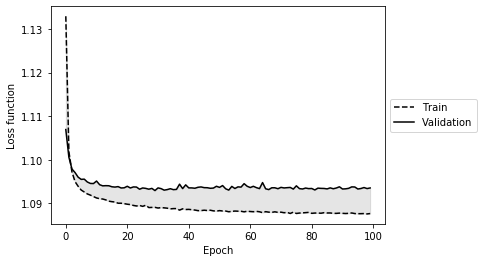

In [67]:
# Plot loss curves
daml.plot.loss(cp);

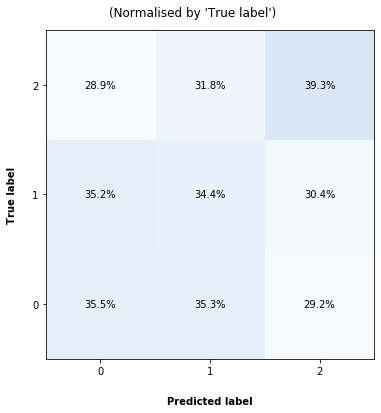

In [68]:
# Get predictions of X_test without weight
pred4 = model4.predict(test_data4)
pred4 = np.asarray([np.argmax(i) for i in pred4])
cm = confusion_matrix(pred4,test_target4)
daml.plot.confusion_matrix (cm, labels=None, normalise=True);